<a href="https://colab.research.google.com/github/srishti-git1110/Health-insurance-prediction/blob/main/Health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#include system file in colab
from google.colab import files 
uploaded=files.upload()

Saving insurance.xlsx to insurance.xlsx


In [ ]:
#reading the file
import io
import pandas as pd
df=pd.read_excel(io.BytesIO(uploaded['insurance.xlsx']))

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info() 
df[df.isnull().any(axis=1)] #no missingness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges


In [ ]:
print(df['smoker'].value_counts())
print(df['sex'].value_counts())
print(df['region'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64
male      676
female    662
Name: sex, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
df.replace({'sex':{'male':0,
                   'female':1},
            'region':{'southeast':0,
                      'northwest':1,
                      'southwest':2,
                      'northeast':3},
            'smoker':{'yes':1,
                      'no':0}},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


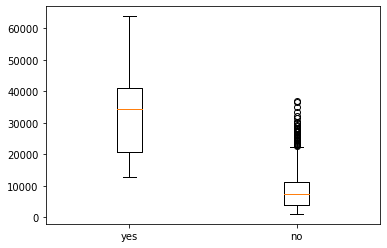

In [ ]:
import matplotlib.pyplot as plt
my_dict={'yes':df['charges'][df['smoker']==1],
         'no':df['charges'][df['smoker']==0] }

fig,ax=plt.subplots()

ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

plt.show() #the box plots show a significant difference in  charges between the two cateogries (smokers and non smokers) in terms of medians and the entire distribution as well
           #smokers tend to have high health insurance charges as compared to non smokers, which is also reasonable intuitively.

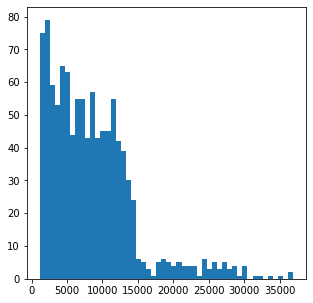

In [ ]:
fig, ax = plt.subplots(figsize =(5,5))
ax.hist(df['charges'][df['smoker']==0],bins=50)
plt.show() 


#the two plots folllowing show dist of charges for non smokers and smokers,
#these plots are far from normal and so we cannot use t test to test for difference in mean charges between smokers and non smokers

#also, the fact that smokers tend to have higher charges is evident from these histograms as well

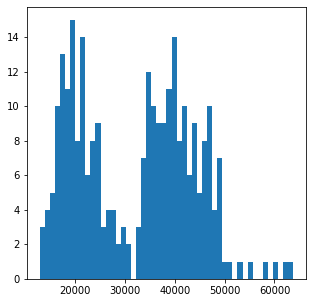

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['smoker']==1],bins=50)
plt.show()

In [ ]:
# we now shift to using mann whitney u test as a non parametric alternative to t test for difference in means
#although this test is not exactly to check for the difference in means between two independent groups,
#it can be used to asses whether two independent groups differ from each other. (in terms of median if some strict assumptions hold that do not seem to hold here)

#null hypothesis- distribution of charges in smokers and non smokers does not differ(although a more formal and appropriate hypothesis is defined differently,
                                                                                      # this could be seen as an implication of the same ) 

#neverthless, the small p value from this test can be interpreted as -

#the data is unusual to encounter if all model assumptions including the null hypo were true, or
#if all 'other' assumptions of the test are satisfied, there exist a significant difference in distribution of charges between the two groups or that the null hypothesis
#can be rejected.


import scipy.stats as stats
stats.mannwhitneyu(x=df['charges'][df['smoker']==1], y=df['charges'][df['smoker']==0], alternative = 'two-sided')

MannwhitneyuResult(statistic=284133.0, pvalue=5.270233444503571e-130)

In [ ]:
#we try to calculate the min sample size required to detect any difference in charges between smokers and non smokers.
from statsmodels.stats.power import TTestIndPower
analysis=TTestIndPower()

result=analysis.solve_power(0.8,power=.8,alpha=0.05)
print(result)

#since we are conducting mann whitney test here, the size calculated from a t test perspective shall not  be very appropriate
#however to successfully carry t test for differences in mean with power=0.8, at least 25 observations are required per group.

25.52457250047935


In [ ]:
##Region

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


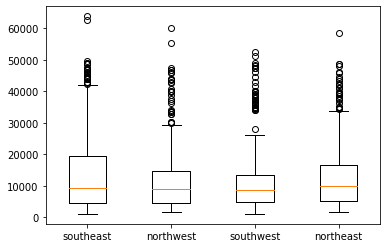

In [ ]:
my_dict={'southeast':df['charges'][df['region']==0],
         'northwest':df['charges'][df['region']==1],
         'southwest':df['charges'][df['region']==2],
         'northeast':df['charges'][df['region']==3]}

fig,ax=plt.subplots()

ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

plt.show()

#according to the box plots, people in different regions do not differ much in terms dist of insurance charges. 
#the distribution of charges in all 4 regions look more or less the same, along with the median charge.


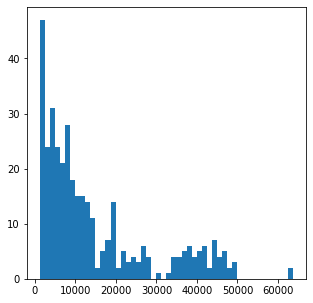

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['region']==0],bins=50)
plt.show()

#the histograms that can be interpreted as distribution or frequency plots show non normal dist of charges
#and so anova cannot be used to test for difference in mean charges between the four regions

#another point to note here is that the shape and scale of distribution of charges in all 4 regions looks almost same  

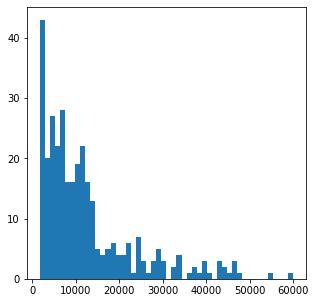

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['region']==1],bins=50)
plt.show()

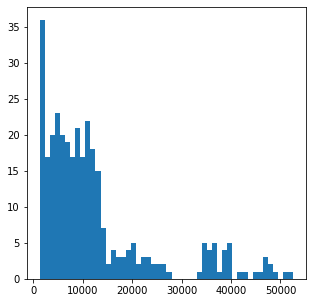

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['region']==2],bins=50)
plt.show()

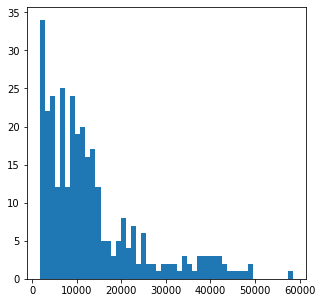

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['region']==3],bins=50)
plt.show()

In [ ]:
#Kw for regions

#so here we resort to anova's non parametric alternative kruskal wallis test that tests whether more than two independent groups of samples originate
#from the same distribution. the difference in distribution may occur in any terms and not just in the central tendency measures.

#null hypothesis: median charge in all 4 regions is equal or same(given shape and scale of distribution of charges in all 4 regions is approx same, which holds true here apparently)

#here the p value > 0.05 (significance level). the interpretation follows -
#under all test assumptions being satisfied including the null hypothesis , the data aren't unusual to encounter
#given all other assumptions are satisfied, we fail to reject the null hypothesis and hence the claim that four regions do not differ from each other in terms of dist of charges
#or in terms of median charge
stats.kruskal(df['charges'][df['region']==0],
              df['charges'][df['region']==1],
              df['charges'][df['region']==2],
              df['charges'][df['region']==3])

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

In [ ]:
##gender

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


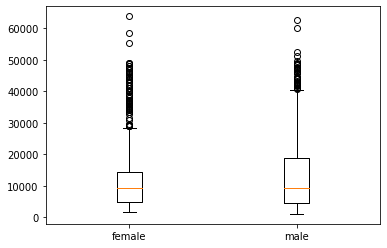

In [ ]:
my_dict={'female':df['charges'][df['sex']==1],
         'male':df['charges'][df['sex']==0] }

fig,ax=plt.subplots()

ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

plt.show()

#box plots here do not show any significant difference in charges between different gender

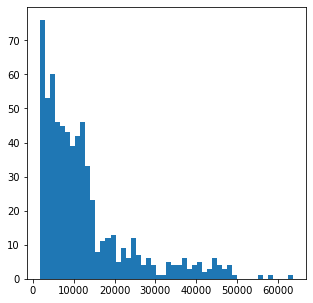

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['sex']==1],bins=50)
plt.show()

#following two histograms show distribution of charges for both genders
#non normal distributions

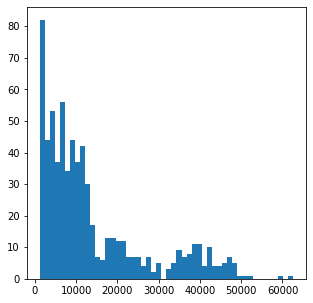

In [ ]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df['charges'][df['sex']==0],bins=50)
plt.show()

In [ ]:
#just like for the smoker case we use mann whitney u test here
#a large p value of 0.728 can be interpreted as -

#null hypothesis- distribution of charges in both genders does not differ(although a more formal and appropriate hypothesis is defined differently, this could be seen as an
                                                                          #implication/interpretation of the same ) 

#under all test assumptions being satisfied including the null hypothesis, the data aren't unusual to encounter or
#given all other assumptions are satisfied, we fail to reject the null hypothesis or
#there does not exist a significant difference between males and females in terms of distribution of charges.

stats.mannwhitneyu(x=df['charges'][df['sex']==1], y=df['charges'][df['sex']==0], alternative = 'two-sided')

MannwhitneyuResult(statistic=221304.0, pvalue=0.7286510894470094)

In [ ]:
print(df['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


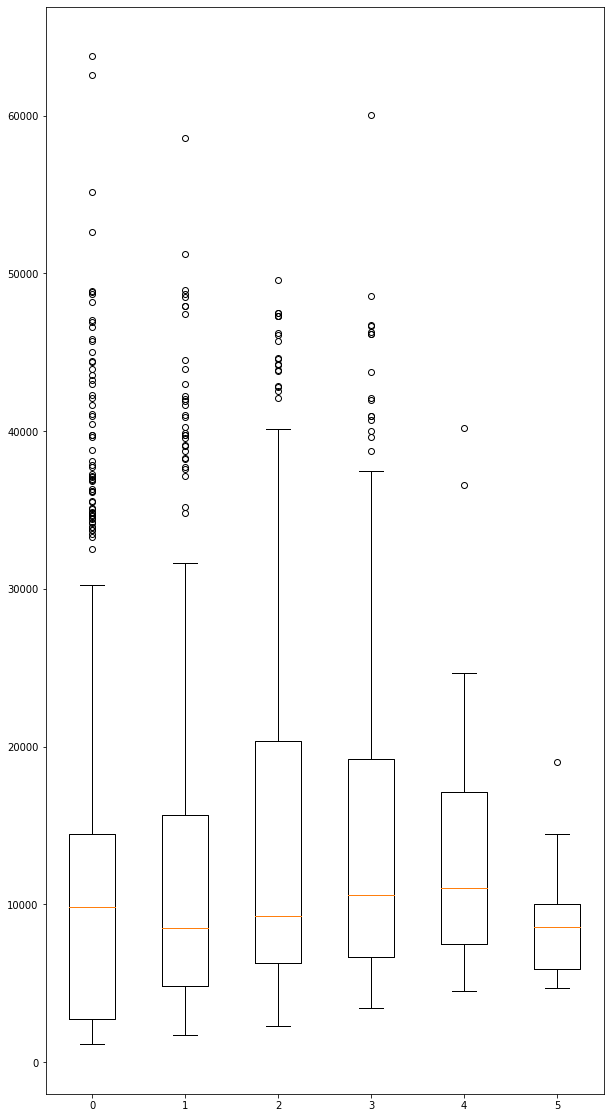

In [ ]:
my_dict={'0':df['charges'][df['children']==0],
         '1':df['charges'][df['children']==1],
         '2':df['charges'][df['children']==2],
         '3':df['charges'][df['children']==3],
         '4':df['charges'][df['children']==4],
         '5':df['charges'][df['children']==5] }

fig,ax=plt.subplots(figsize=(10,20))

ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

plt.show() #the boxplots show an almost similar distribution of charges for people with 0,1,2,3,4,5 no. of children

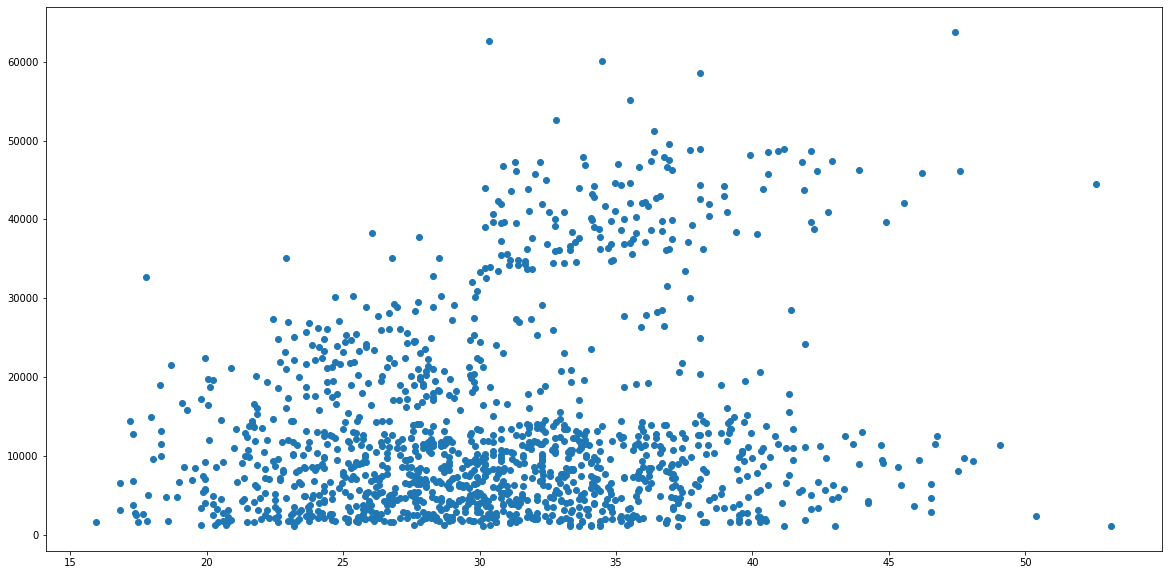

In [ ]:
x=df['bmi']
y=df['charges']
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.show()

#this doesnt look like a linear trend, but apparently there exists some form of relationship between charges and bmi, maybe depending on some another feature.
#we can see if the relationship between charges and bmi differs based on if an invidual is a smoker or not, or based on the gender of the person.

#however gender is less apparent to cause changes in behaviour as the boxplots of gender vs charges doesnt appear to show any significance thereof.


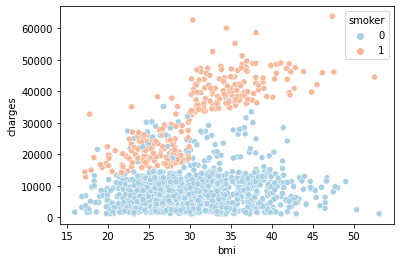

In [ ]:
import seaborn as sns
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='RdBu_r')

#according to this plot,
#for non smokers (blue) the charges do not really depend on the bmi, or depend very less for that matter
#for smokers (red)charges show a somewhat upward trend with increasing bmi

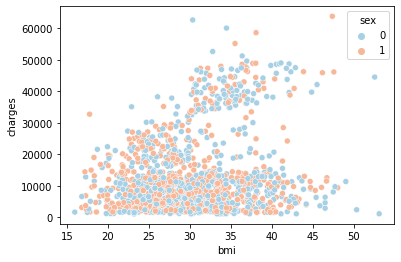

In [ ]:
import seaborn as sns
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='RdBu_r') 

#however gender doesnt seem to have any impact at all on the relationship between bmi and charges

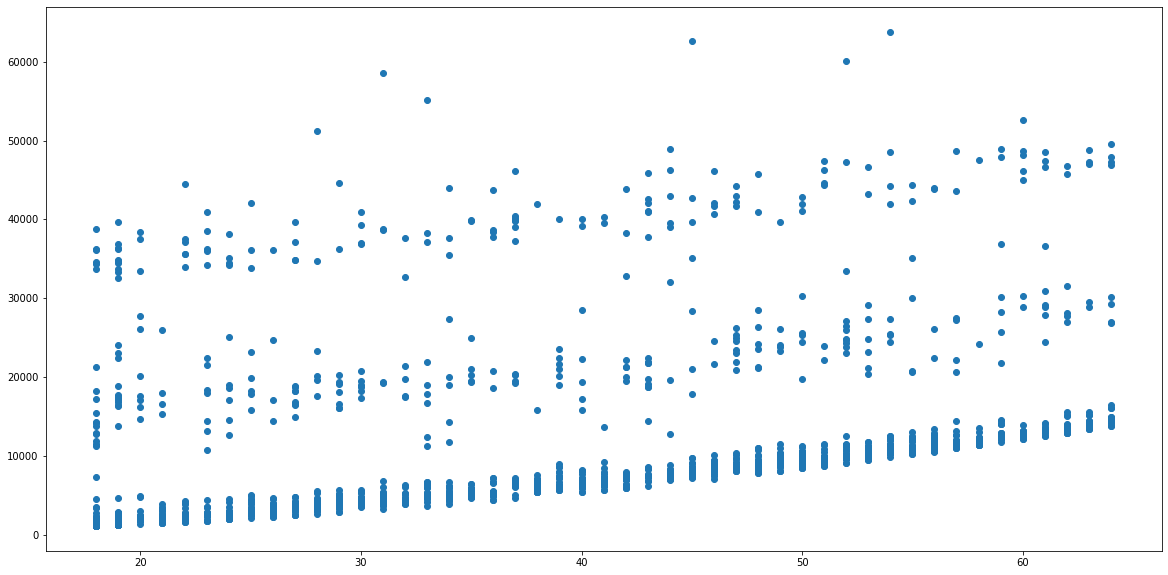

In [ ]:
x=df['age']
y=df['charges']
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.show()

#this plot is strikingly informative as there clearly is an upward trend in insurance charges with increasing age
#however apparently there are three different series here, this can be an affect of a third feature.
#we'll check this for features 'sex' and 'smoker'

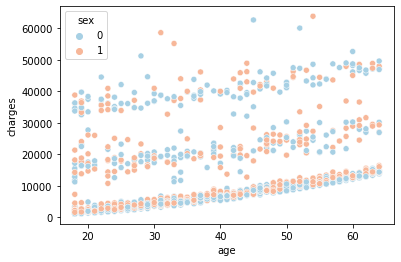

In [ ]:
import seaborn as sns
sns.scatterplot(x='age',y='charges',hue='sex',data=df,palette='RdBu_r')

#sex doesnt seem to affect the relationship between charges and age

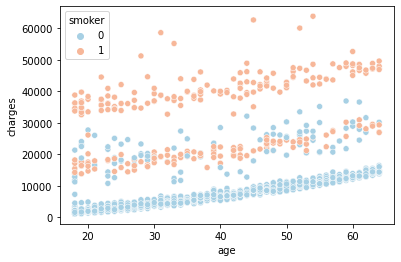

In [ ]:
import seaborn as sns
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='RdBu_r')

#the first upward trend from the bottom (blue) shows charges increase with age for non smokers remaining within a low charge boundary
#the top red upward trend shows increasing charges with age for smokers as well, however scatterdness is more here


In [ ]:
#according to the plots and analysis above tree based models seem appropriate for predicting charges

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))

R2 test: 0.7636527885282822


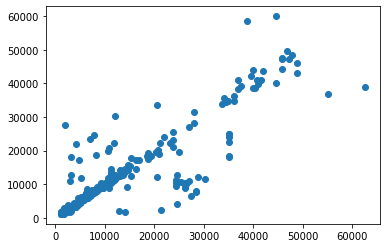

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.show()

#predicted vs actual for the test set

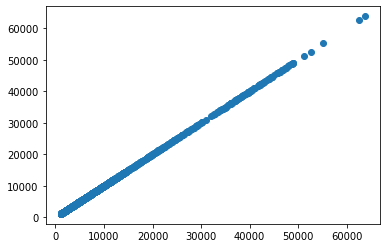

In [ ]:
plt.scatter(clf.predict(X_train),y_train)
plt.show()

#predicted vs actual for the train set

#this is a clear case of overfitting as the performance on train set is exceedingly well with a poor generalisation on the test set

R2 test: 0.8537851656199678


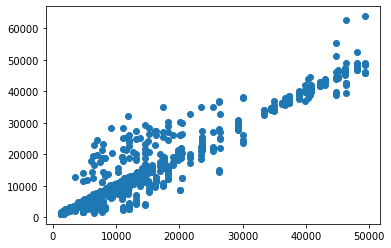

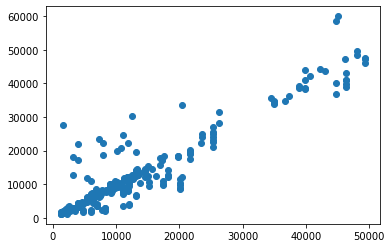

In [ ]:
#tuning some hyperparamters for better generalisation on test set
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeRegressor(min_samples_leaf=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt
plt.scatter(clf.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

#R2 value for the test set improves showing better generalisation

In [ ]:
print('for min samples in a node =5, test error= '+str(metrics.mean_squared_error(y_test,y_pred)))

for min samples in a node =5, test error= 20888684.18865764


R2 test: 0.8311882892268674


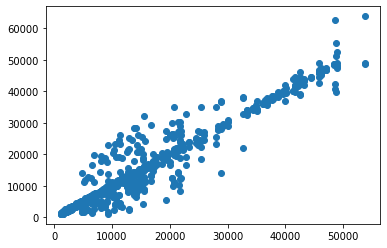

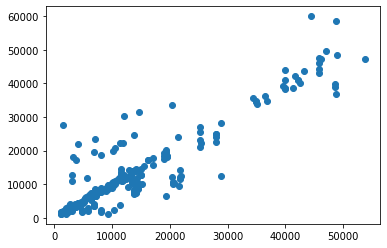

for min samples in a node =3, test error= 24845706.969354745


In [ ]:
#tring another value of hyperparameter for the same model
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf = DecisionTreeRegressor(min_samples_leaf=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt

plt.scatter(clf.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

print('for min samples in a node =3, test error= '+str(metrics.mean_squared_error(y_test,y_pred)))

#performance slightly deterioates

R2 test: 0.8392083211666261


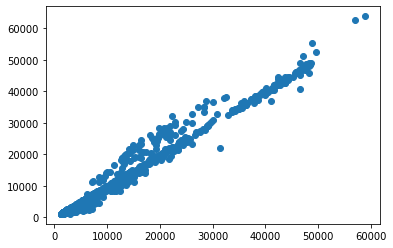

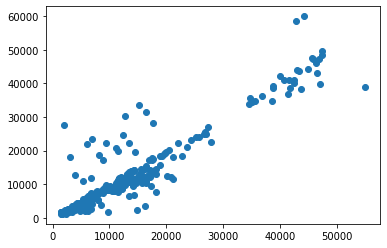

for random forest with 100 trees, test error= 22203364.411184367


In [ ]:
#another tree based model random forest regressor

from sklearn.ensemble import RandomForestRegressor
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt

plt.scatter(regressor.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

print('for random forest with 100 trees, test error= '+str(metrics.mean_squared_error(y_test,y_pred)))

R2 test: 0.8396082390713131


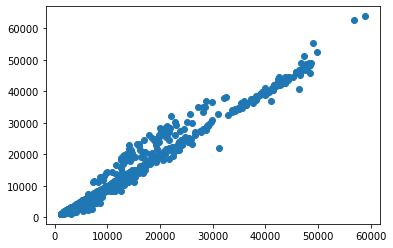

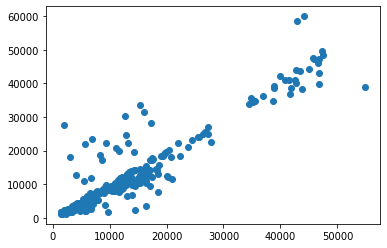

for random forest with 90 trees, test error= 22138077.185659982


In [ ]:
#some hyperparamter tweaks for random forest
from sklearn.ensemble import RandomForestRegressor
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = RandomForestRegressor(n_estimators = 90, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt
plt.scatter(regressor.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

print('for random forest with 90 trees, test error= '+str(metrics.mean_squared_error(y_test,y_pred)))

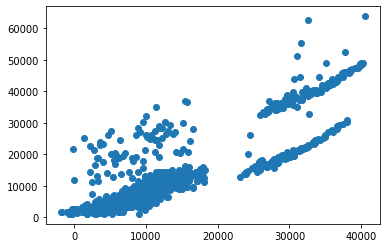

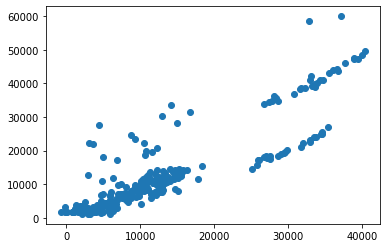

0.7611786615107553


In [ ]:
#not really a good idea, but we could check the performance of linear regression here as a baseline
#since as per above analysis, interactions exist between different features

from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
plt.scatter(reg.predict(X_train),y_train)
plt.show()
plt.scatter(reg.predict(X_test),y_test)
plt.show()
print(reg.score(X_test,y_test))


#clearly an slrm isnt a good idea here, but might be tweaked to include higher order interactions (or regularization as and how the case would be)



In [ ]:
#we now resort to choosing the best set of hyperparamteres for the decision tree regressor and the random forest regressor

!pip install optuna
import optuna
from sklearn import model_selection
def objective(trial):
  min_samples_leaf=trial.suggest_int('min_samples_leaf',2,20)
  clf = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
  return model_selection.cross_val_score(clf,X_train,y_train,n_jobs=-1,cv=5).mean()

In [ ]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

[I 2021-12-23 08:35:41,366] A new study created in memory with name: no-name-74f5e49e-7547-4578-bca1-ec73ca86392c
[I 2021-12-23 08:35:43,317] Trial 0 finished with value: 0.8344699901675752 and parameters: {'min_samples_leaf': 13}. Best is trial 0 with value: 0.8344699901675752.
[I 2021-12-23 08:35:43,426] Trial 1 finished with value: 0.8375929548115127 and parameters: {'min_samples_leaf': 20}. Best is trial 1 with value: 0.8375929548115127.
[I 2021-12-23 08:35:43,494] Trial 2 finished with value: 0.8365508835276876 and parameters: {'min_samples_leaf': 18}. Best is trial 1 with value: 0.8375929548115127.
[I 2021-12-23 08:35:43,548] Trial 3 finished with value: 0.8286007887636078 and parameters: {'min_samples_leaf': 8}. Best is trial 1 with value: 0.8375929548115127.
[I 2021-12-23 08:35:43,607] Trial 4 finished with value: 0.8365508835276876 and parameters: {'min_samples_leaf': 18}. Best is trial 1 with value: 0.8375929548115127.
[I 2021-12-23 08:35:43,713] Trial 5 finished with value: 

In [ ]:
#13 is best with cv
#lets check for test set with min_samples_leaf=13


R2 test: 0.8515398985440339


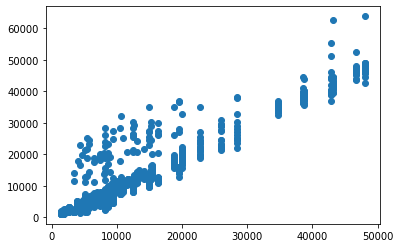

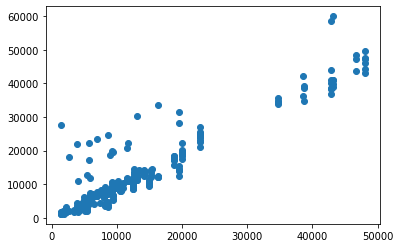

Feature: 0, score: 0.11676
Feature: 1, score: 0.00071
Feature: 2, score: 0.16793
Feature: 3, score: 0.00653
Feature: 4, score: 0.70390
Feature: 5, score: 0.00418


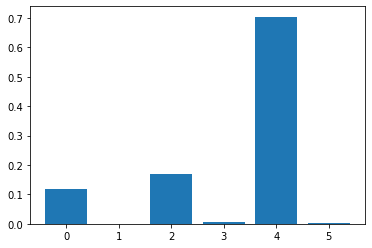

In [ ]:
clf = DecisionTreeRegressor(min_samples_leaf=13)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt
plt.scatter(clf.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()


#here we go on checking the most important set of features using feature importance functionality

importance=clf.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, score: %.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#for the decision tree regressor, the most important set of features is smoker, bmi, age in decreasing order of importance.
#this was also evident from above statistical analysis.


In [ ]:
#choosing hyperparamters for RF regressor

def objective(trial):
  
  X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
  y=df['charges']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

  rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
  rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
  regg = RandomForestRegressor(max_depth=rf_max_depth, n_estimators=rf_n_estimators)
  return model_selection.cross_val_score(regg,X_train,y_train,n_jobs=-1,cv=5).mean()

study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=90)

[I 2021-12-23 09:04:47,652] A new study created in memory with name: no-name-957811e8-3dc3-408c-8edf-849935a7bdf7
[I 2021-12-23 09:04:51,760] Trial 0 finished with value: 0.8515663451277801 and parameters: {'rf_n_estimators': 509, 'rf_max_depth': 4}. Best is trial 0 with value: 0.8515663451277801.
[I 2021-12-23 09:04:52,118] Trial 1 finished with value: 0.8247109365945156 and parameters: {'rf_n_estimators': 33, 'rf_max_depth': 25}. Best is trial 0 with value: 0.8515663451277801.
[I 2021-12-23 09:04:52,932] Trial 2 finished with value: 0.8515707013278224 and parameters: {'rf_n_estimators': 124, 'rf_max_depth': 4}. Best is trial 2 with value: 0.8515707013278224.
[I 2021-12-23 09:04:59,260] Trial 3 finished with value: 0.849124346985849 and parameters: {'rf_n_estimators': 967, 'rf_max_depth': 5}. Best is trial 2 with value: 0.8515707013278224.
[I 2021-12-23 09:05:00,069] Trial 4 finished with value: 0.8215180157496516 and parameters: {'rf_n_estimators': 142, 'rf_max_depth': 2}. Best is tr

R2 test: 0.8539438634432478


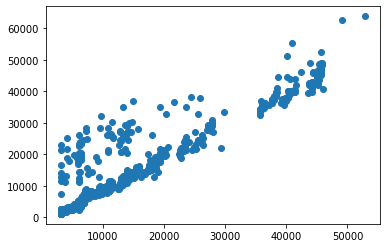

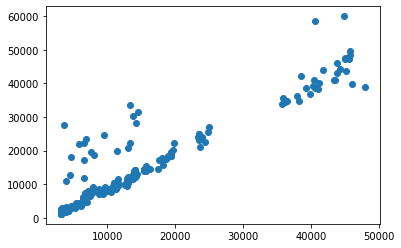

Feature: 0, score: 0.11369
Feature: 1, score: 0.00019
Feature: 2, score: 0.16805
Feature: 3, score: 0.00727
Feature: 4, score: 0.70963
Feature: 5, score: 0.00118


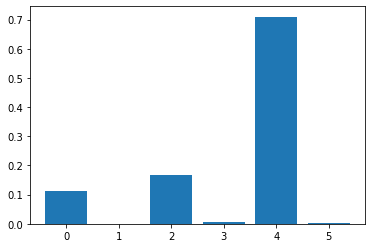

In [ ]:
#we now check the performance of the best trial on test set

regressor = RandomForestRegressor(n_estimators = 750 , max_depth = 4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt

plt.scatter(regressor.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

#feature importance determination

importance=regressor.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, score: %.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#results for feature importance here are same as that in the decision tree case above.

In [ ]:
#some more plots to discover patterns between pairs of vaiables

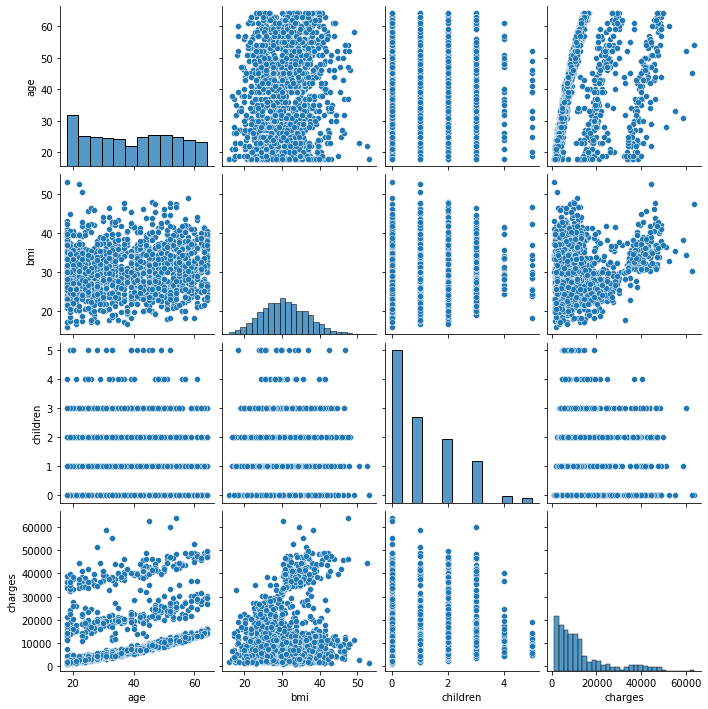

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [ ]:
#column 1
#age vs charges: explained above
#age vs children: apparently, no relationship. we see people possessing any and every number of children for all age groups
#age vs bmi: people in all ages have bmi across same levels. no significant relationship

In [ ]:
#col 2
#bmi vs charges: explored above
#bmi vs children: no apparent relationship

In [ ]:
#col 3
#children vs charges: explored earlier via tests. no apparent relationship


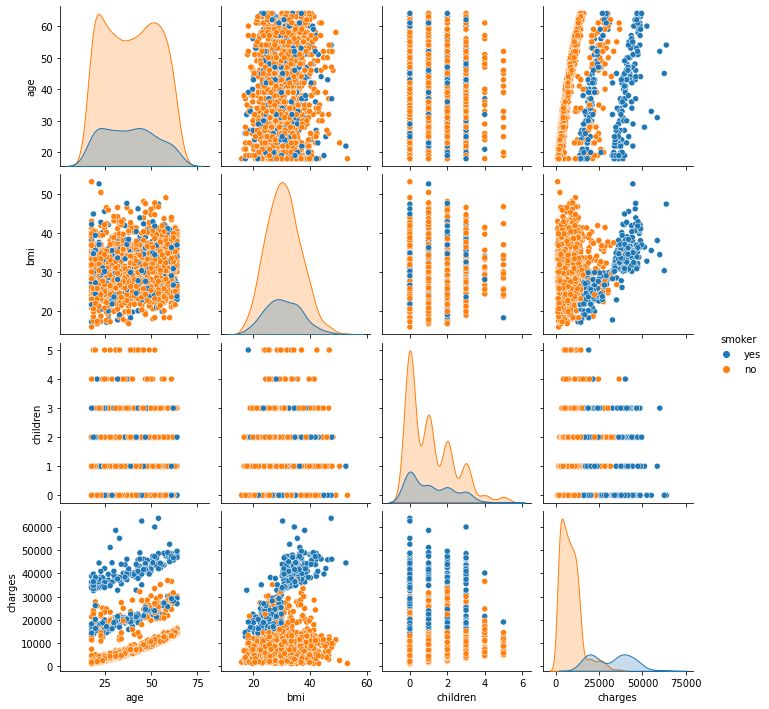

In [ ]:
sns.pairplot(df,hue='smoker')

In [ ]:
#col 1
#smokers and non smokers seem equally distributed throughout the graph of bmi vs age; no meaningful insight here. same is the case for age vs children
#impact of smoking on charges vs age explored earlier


In [ ]:
#col 2
#impact of smoking on charges vs bmi explored earlier
#smokers and non smokers seem equally distributed throughout the graph of bmi vs children; no meaningful insight here. same is the case for age vs bmi

#col 3
#smoking effect on children vs charges: for individuals with any no of children, non smokers tend to have less charges as compared to smokers. this is just another confirmation
#of the fact that smoking impacts charges while no of children do not.


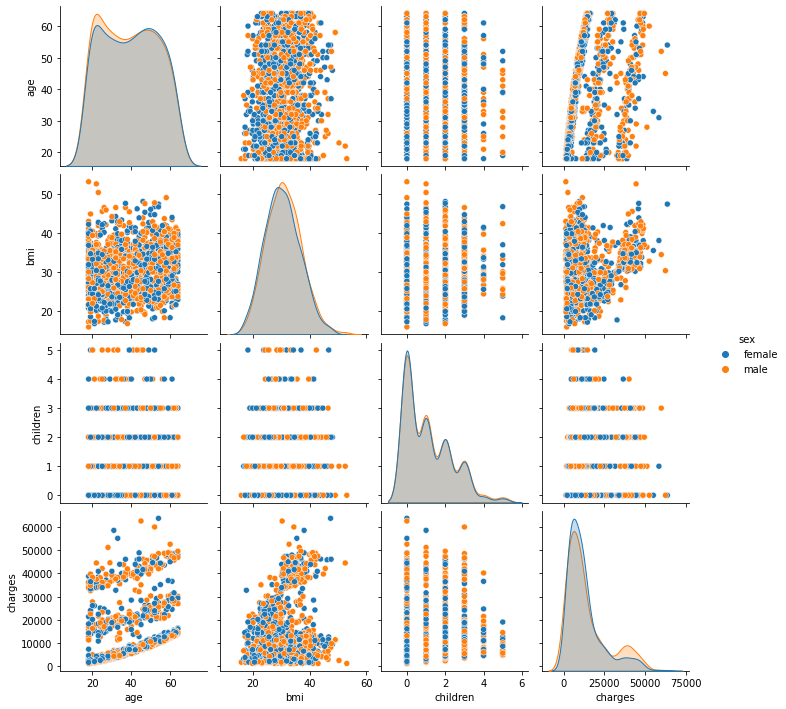

In [ ]:
sns.pairplot(df,hue='sex')

R2 test: 0.8477706665867665


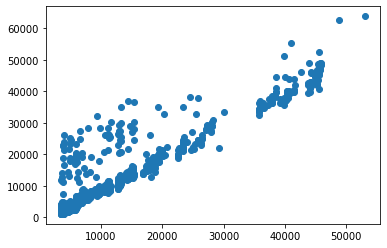

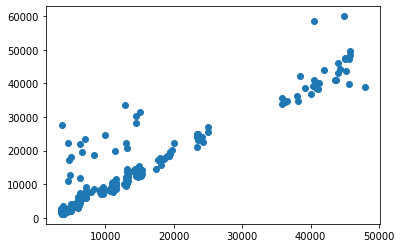

In [ ]:
#the above pairplots show that gender doesnt seem to affect the relationship between any pair of variables.

#additional comments:
#some features that arent statistically important could be removed to get a better performance on test set.
#we try to do this below:

from sklearn.ensemble import RandomForestRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

X=df[['bmi','smoker','age']]
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


regressor = RandomForestRegressor(n_estimators = 750 , max_depth = 4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('R2 test: '+str(metrics.r2_score(y_pred,y_test)))
import matplotlib.pyplot as plt

plt.scatter(regressor.predict(X_train),y_train)
plt.show()
plt.scatter(y_pred,y_test)
plt.show()

#this shows the performance very slightly deterioates, but since simpler models are always better, it could be a good option to go only with three features (age,bmi,smoker)
#for modelling and prediction purposes.
